# <center>Data Mining Project</center>

<center>
Master in Data Science and Advanced Analytics <br>
NOVA Information Management School
</center>

** **
## <center>*ABCDEats Inc*</center>

<center>
Group 19 <br>
Jan-Louis Schneider, 20240506  <br>
Marta Boavida, 20240519  <br>
Matilde Miguel, 20240549  <br>
Sofia Gomes, 20240848  <br>
</center>

** **

In [1]:
!jupyter nbconvert --to script "New_Features.ipynb"

[NbConvertApp] Converting notebook New_Features.ipynb to script
[NbConvertApp] Writing 15883 bytes to New_Features.py


[NbConvertApp] Converting notebook Processing_Data.ipynb to script
[NbConvertApp] Writing 25172 bytes to Processing_Data.py


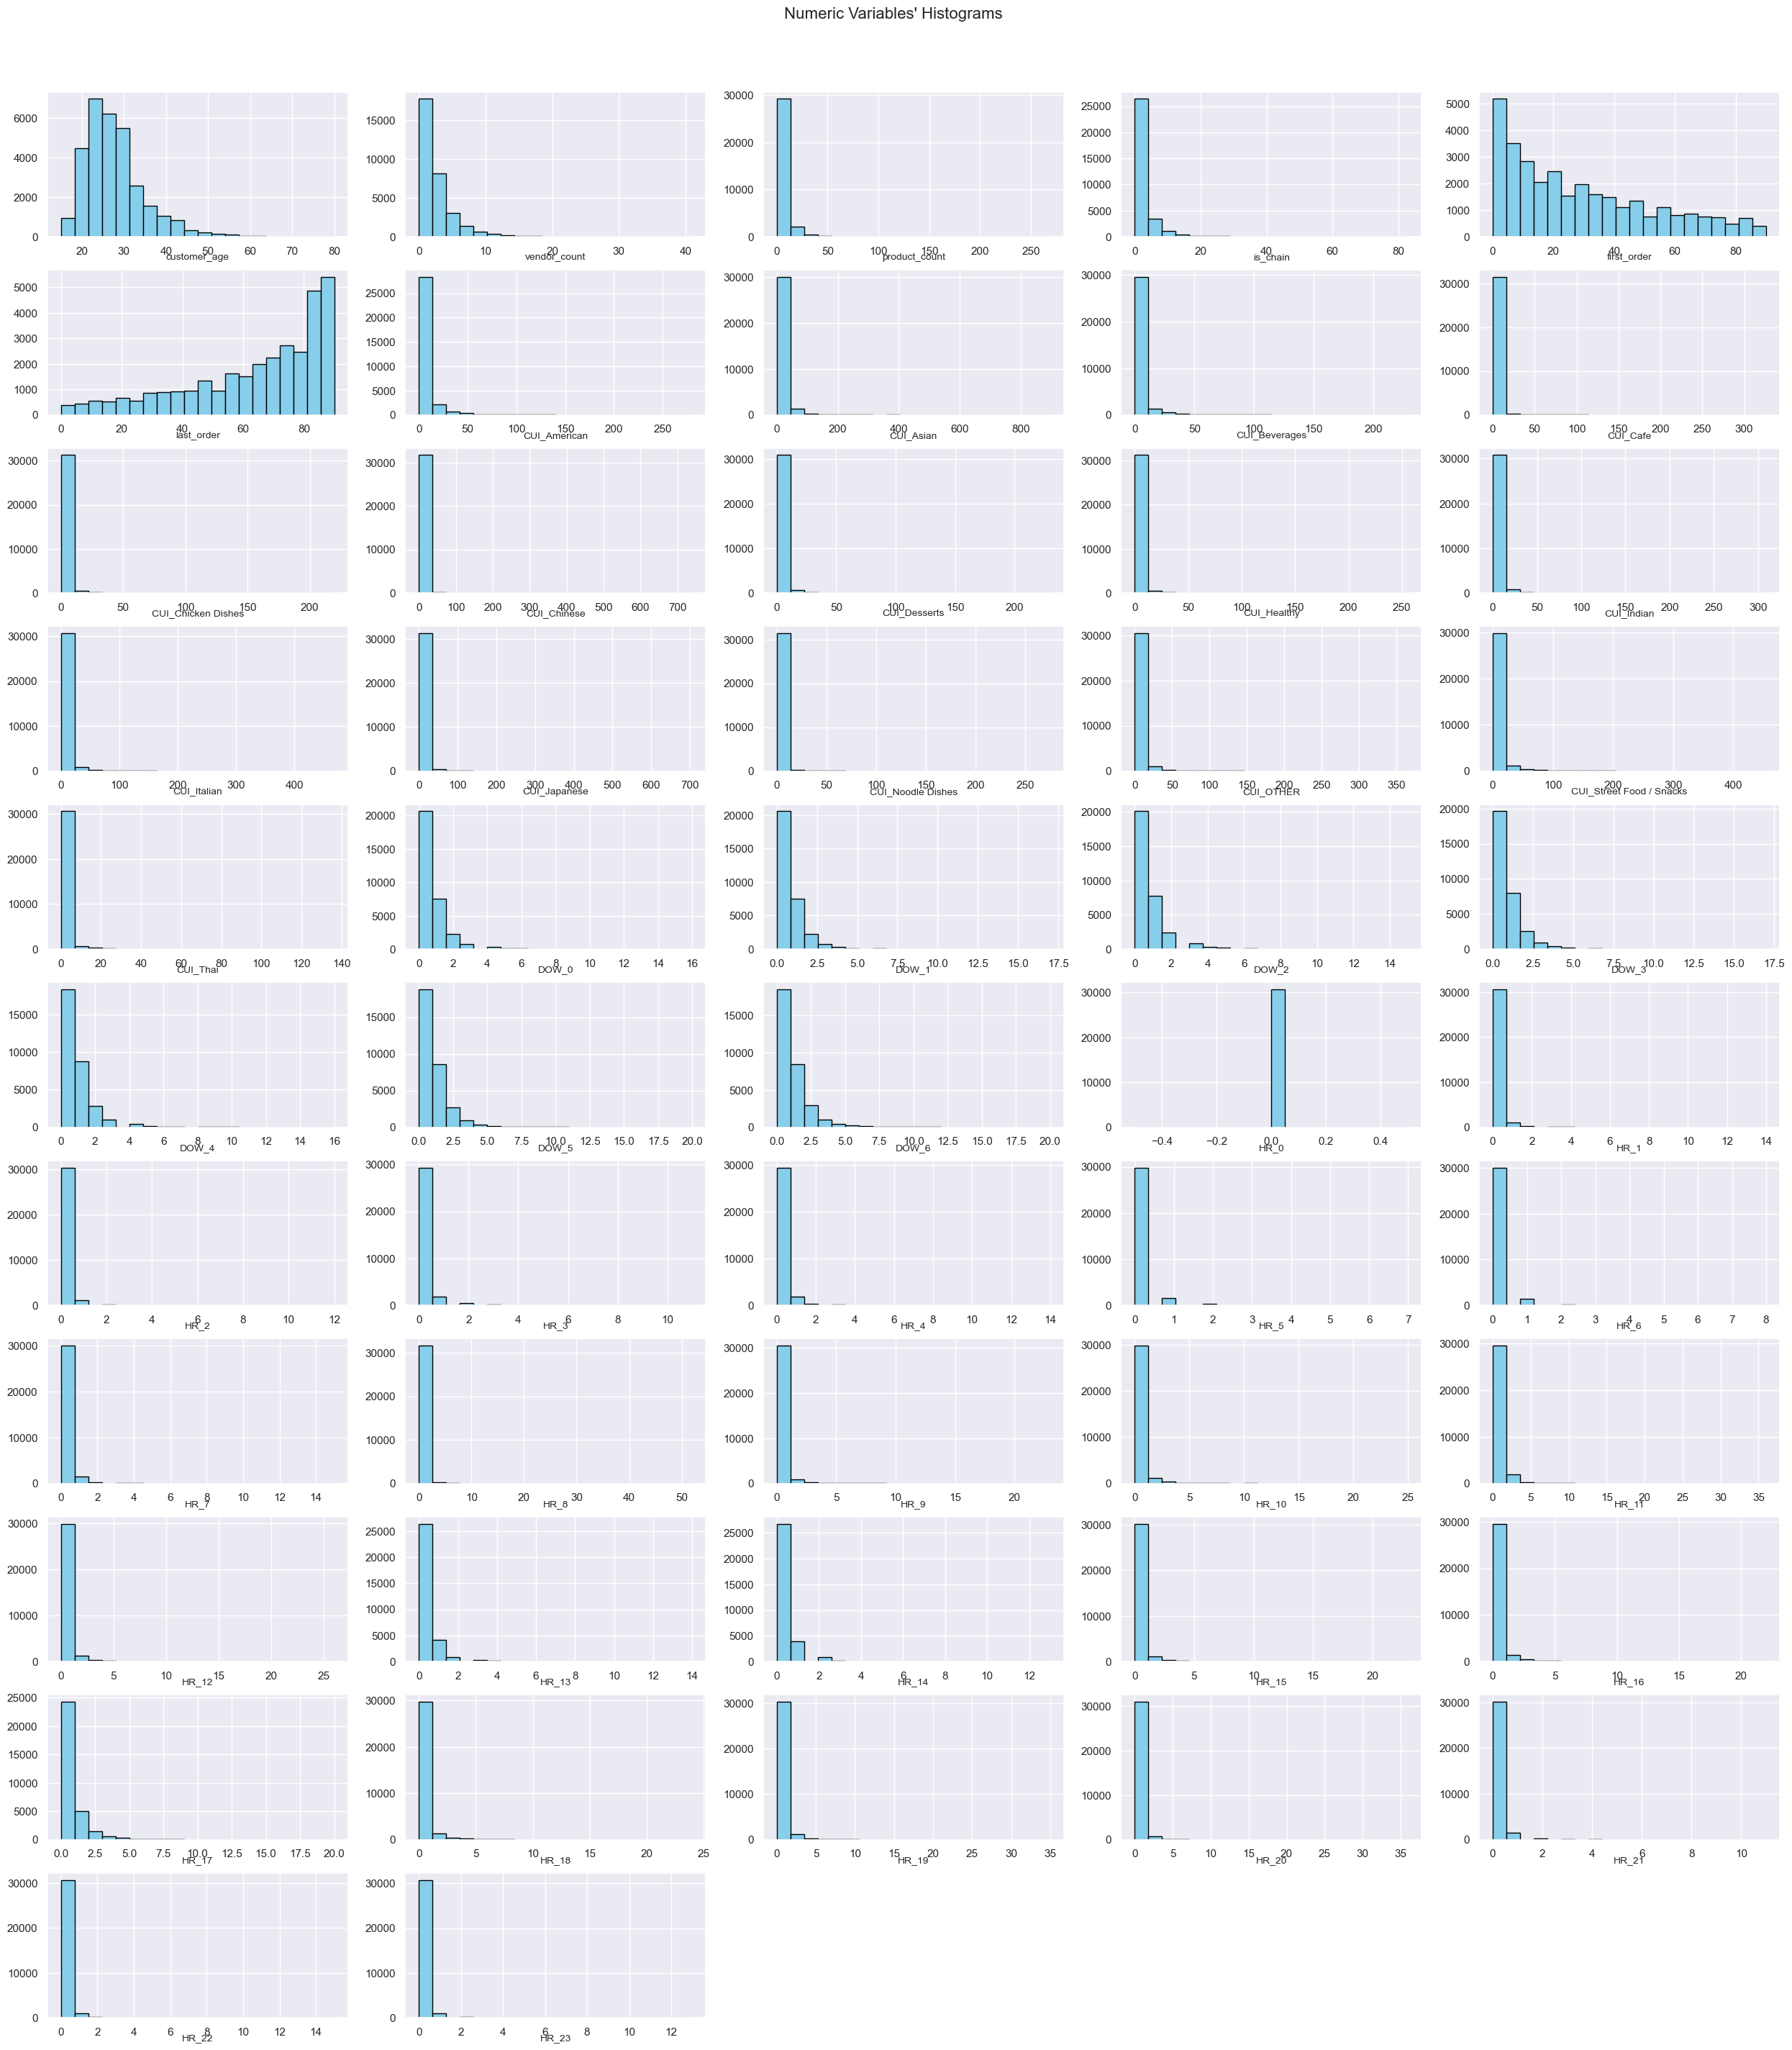

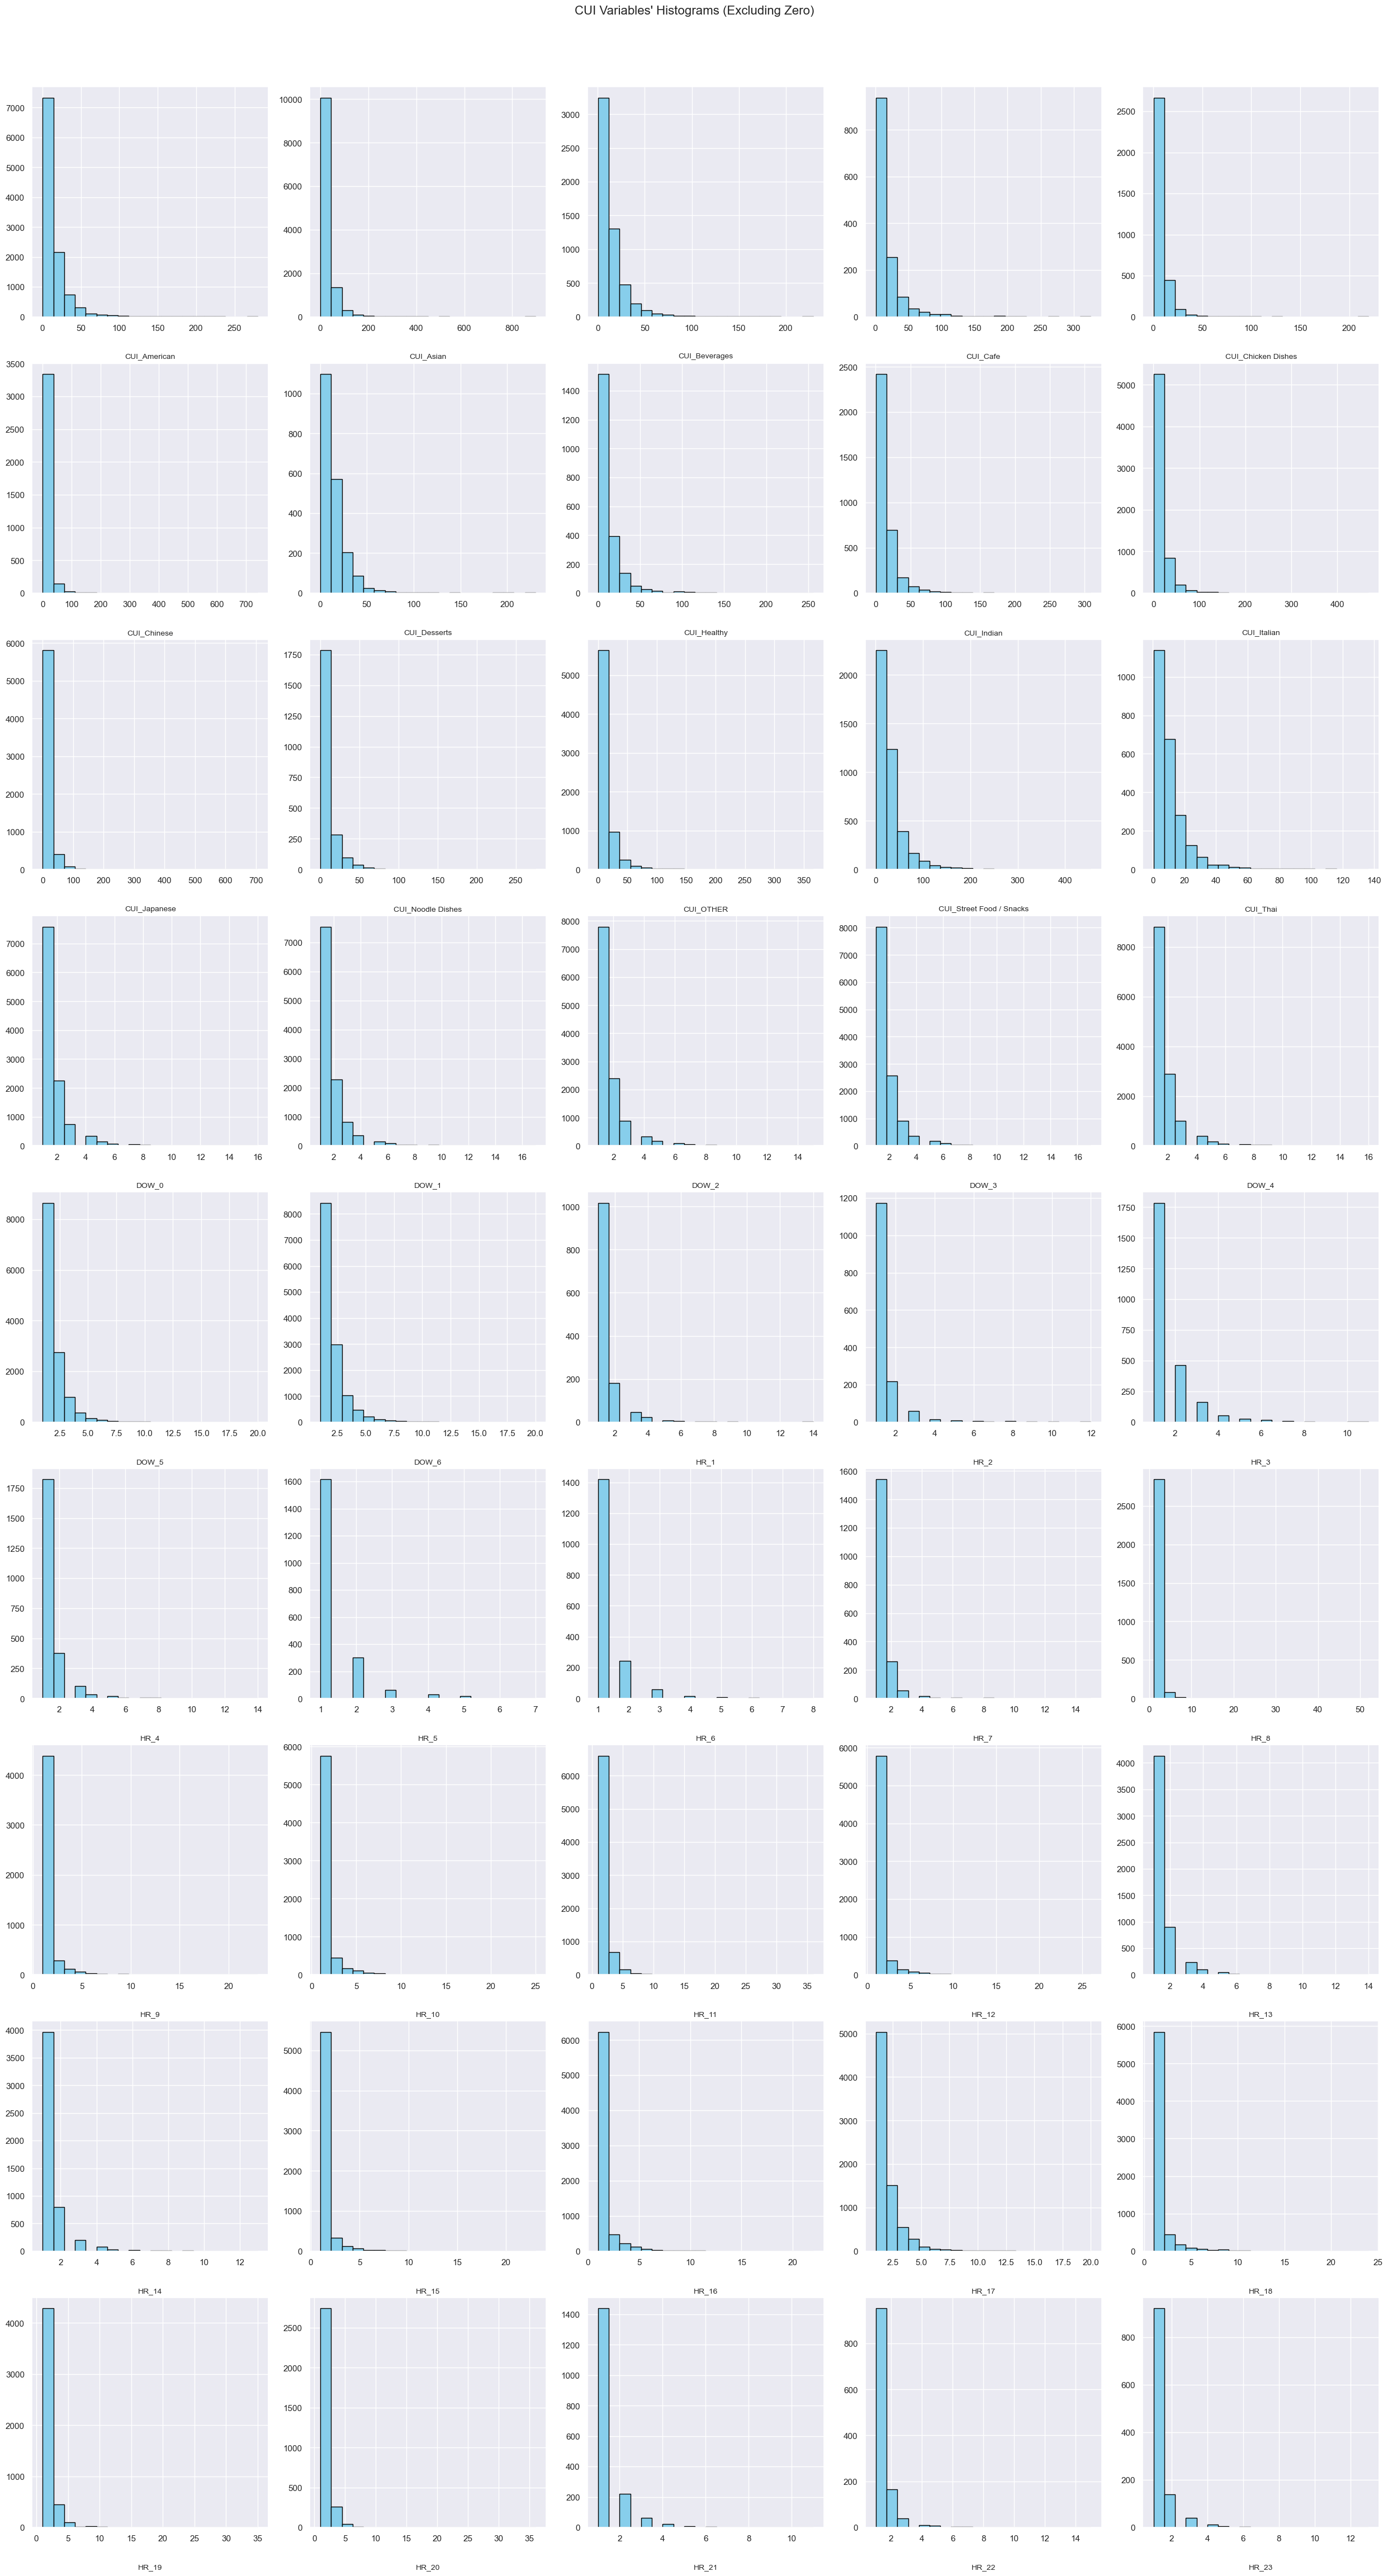

C:\Users\Janny\Documents\GitHub\Data_Mining_2425\src\Processing_Data.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered,


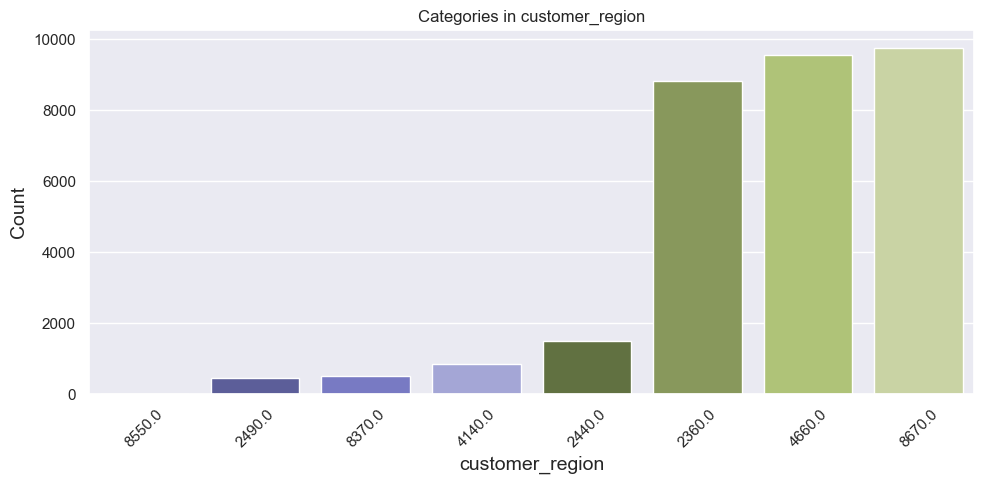

C:\Users\Janny\Documents\GitHub\Data_Mining_2425\src\Processing_Data.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered,


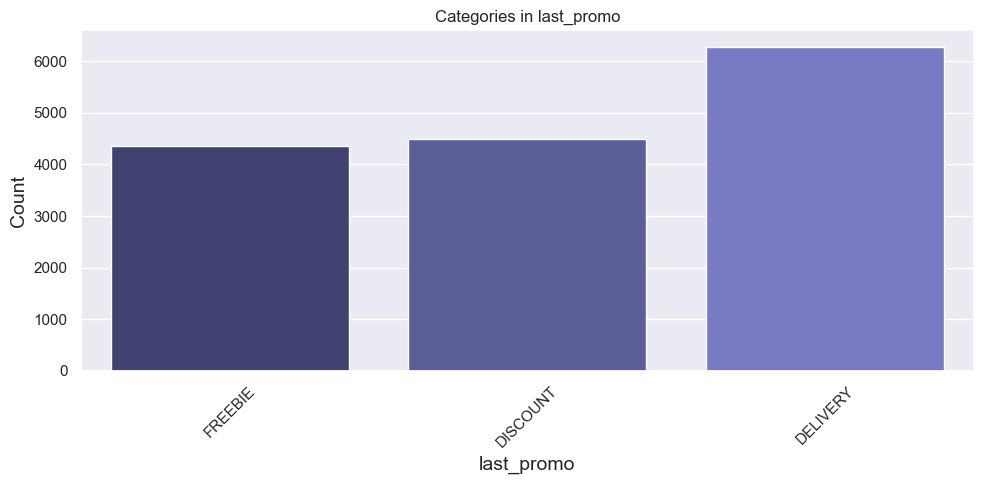

C:\Users\Janny\Documents\GitHub\Data_Mining_2425\src\Processing_Data.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered,


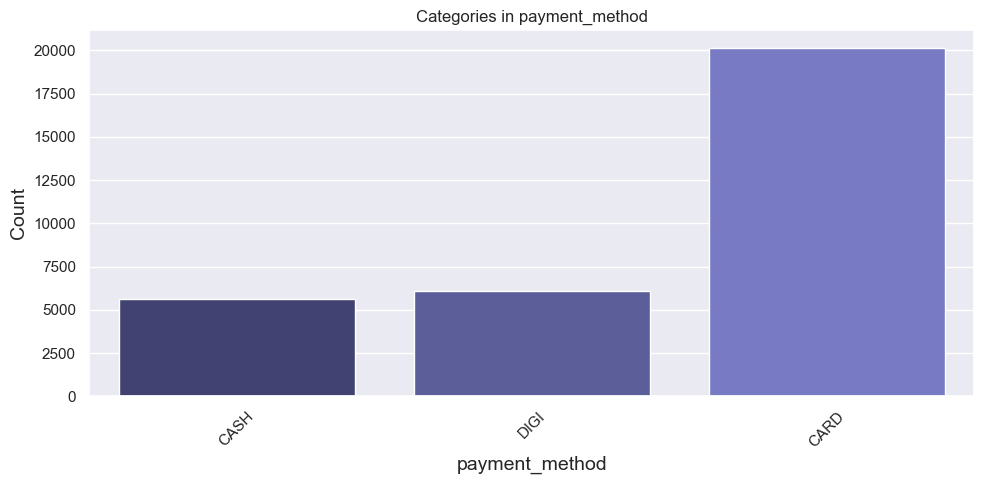

Percentage of missing values:
 last_promo         52.530196
HR_0                3.651765
customer_age        2.280784
customer_region     1.386667
first_order         0.332549
dtype: float64
Percentage of missing values:
 last_promo         52.530196
customer_region     1.386667
first_order         0.332549
dtype: float64
Percentage of missing values:
 first_order    0.332549
dtype: float64
Missing values in first_order have been imputed using KNN.
Missing values in product_count have been imputed using KNN.


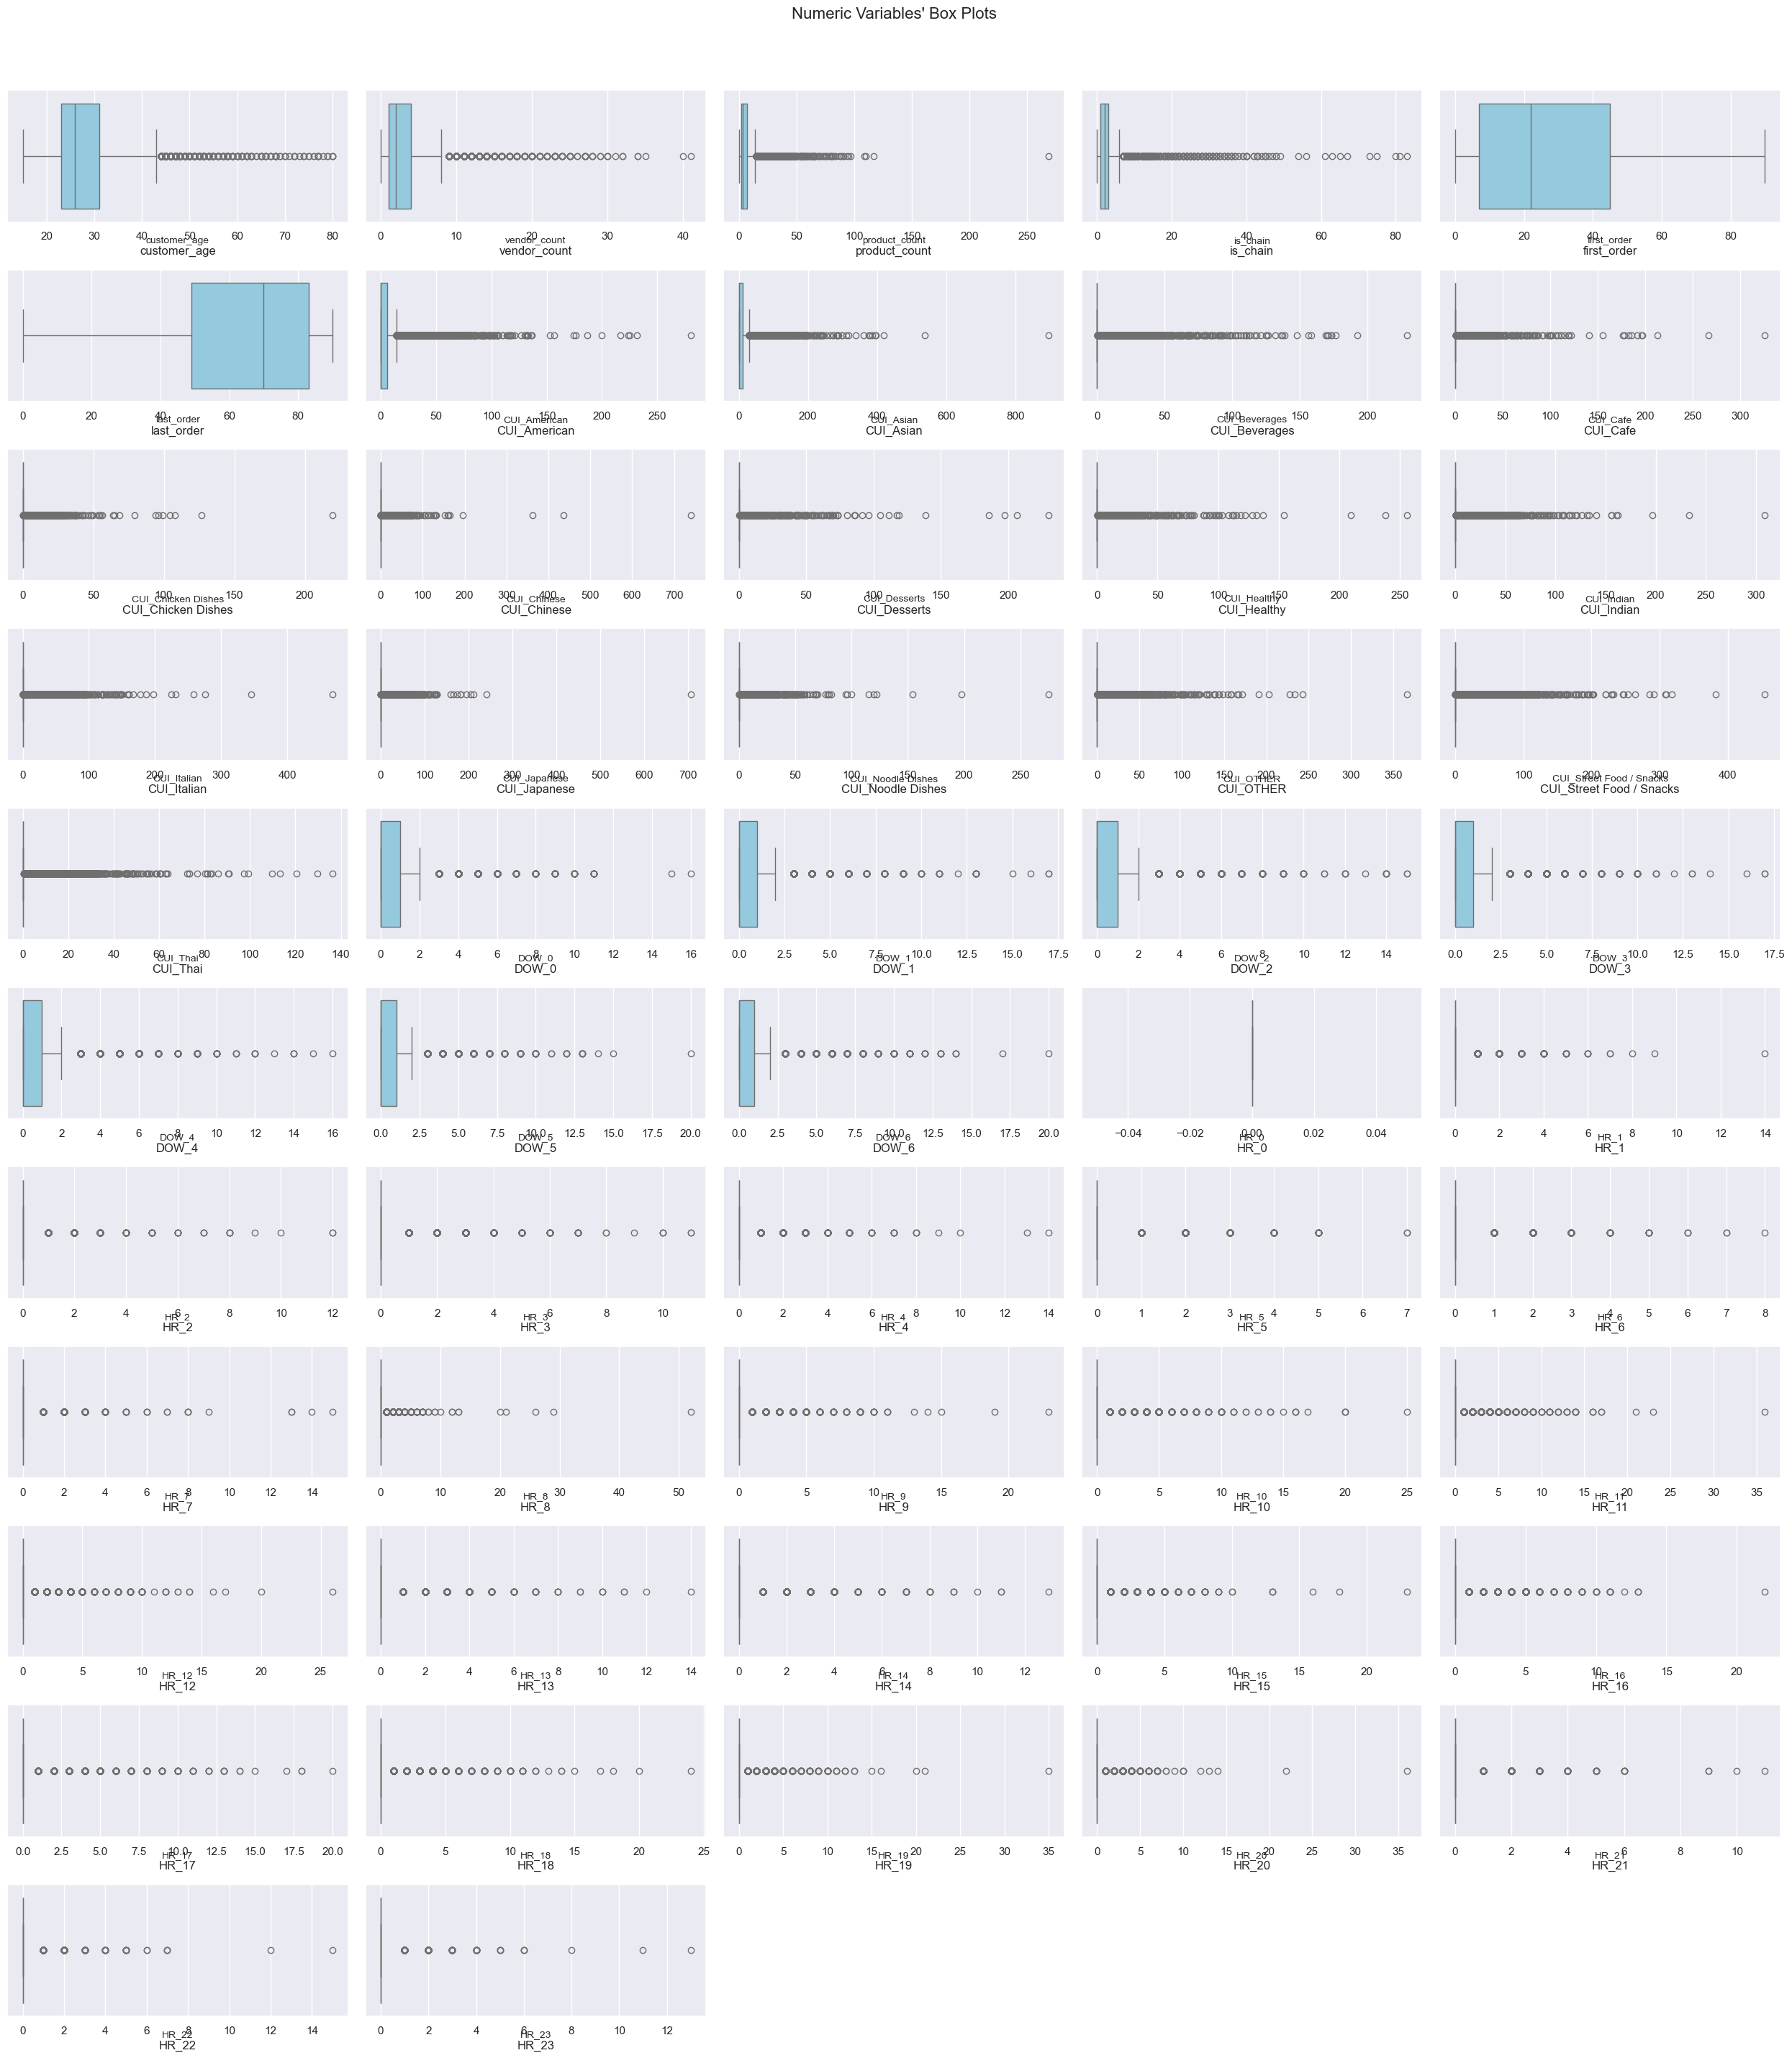

customer_age               Lower Limit:       11.0      Upper Limit:       43.0
vendor_count               Lower Limit:       -3.5      Upper Limit:        8.5
product_count              Lower Limit:       -5.5      Upper Limit:       14.5
is_chain                   Lower Limit:       -2.0      Upper Limit:        6.0
first_order                Lower Limit:      -50.0      Upper Limit:      102.0
last_order                 Lower Limit:       -2.0      Upper Limit:      134.0
CUI_American               Lower Limit:      -8.49      Upper Limit:      14.15
CUI_Asian                  Lower Limit:    -17.745      Upper Limit: 29.575000000000003
CUI_Beverages              Lower Limit:        0.0      Upper Limit:        0.0
CUI_Cafe                   Lower Limit:        0.0      Upper Limit:        0.0
CUI_Chicken Dishes         Lower Limit:        0.0      Upper Limit:        0.0
CUI_Chinese                Lower Limit:        0.0      Upper Limit:        0.0
CUI_Desserts               Lower

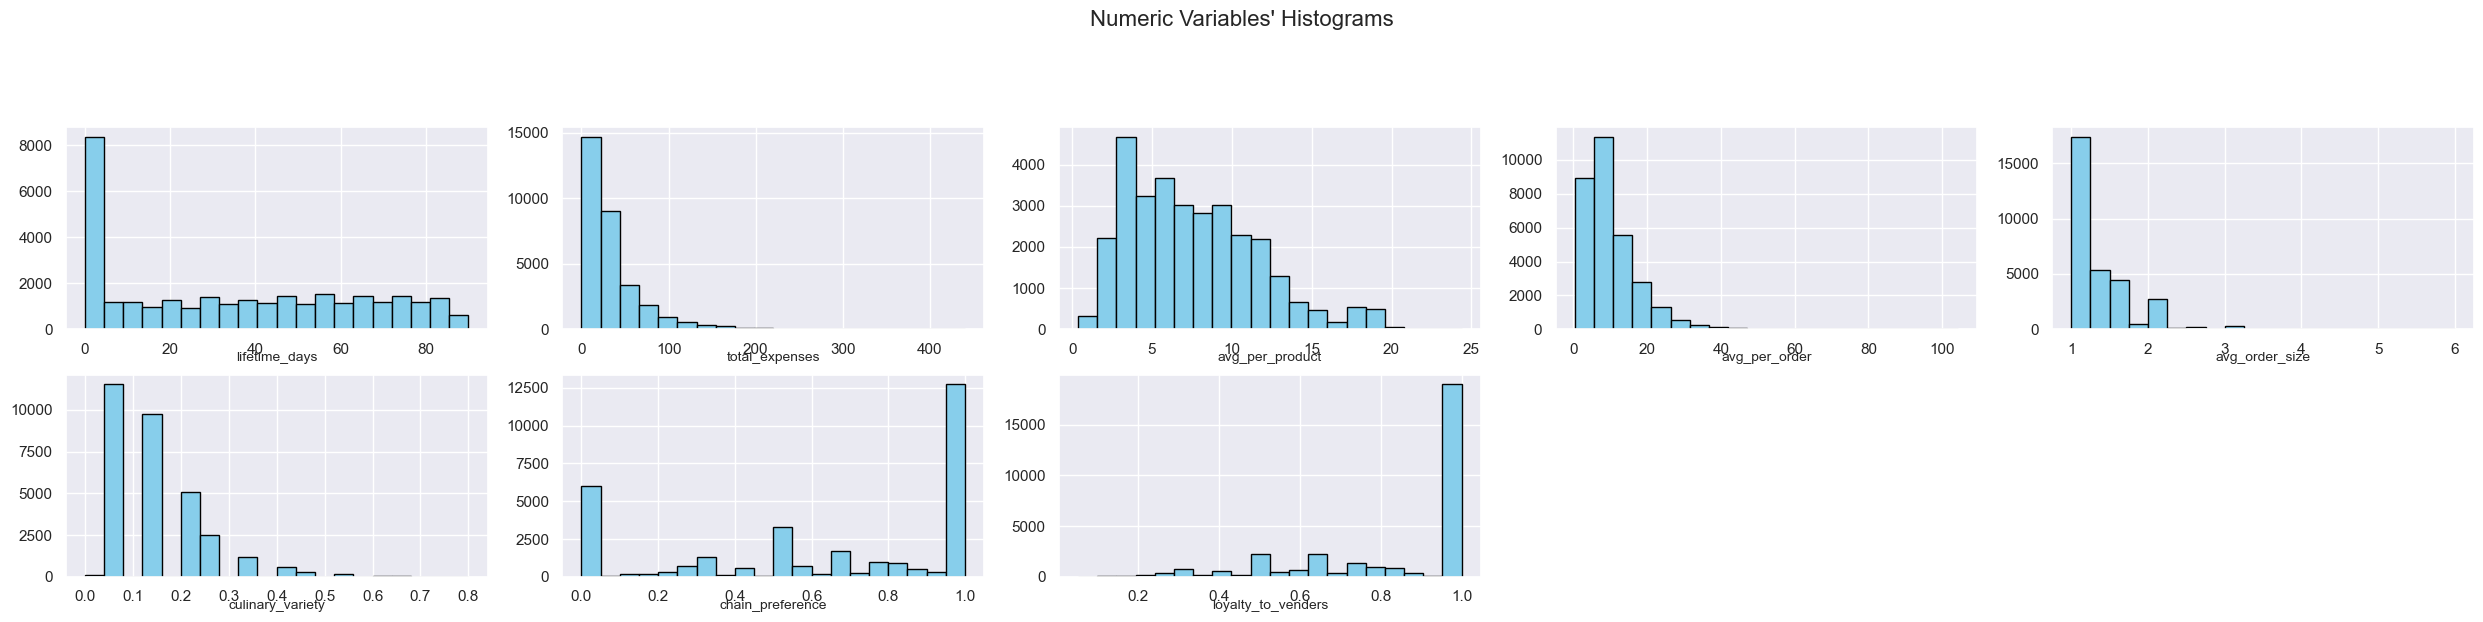

C:\Users\Janny\Documents\GitHub\Data_Mining_2425\src\New_Features.py:300: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered,


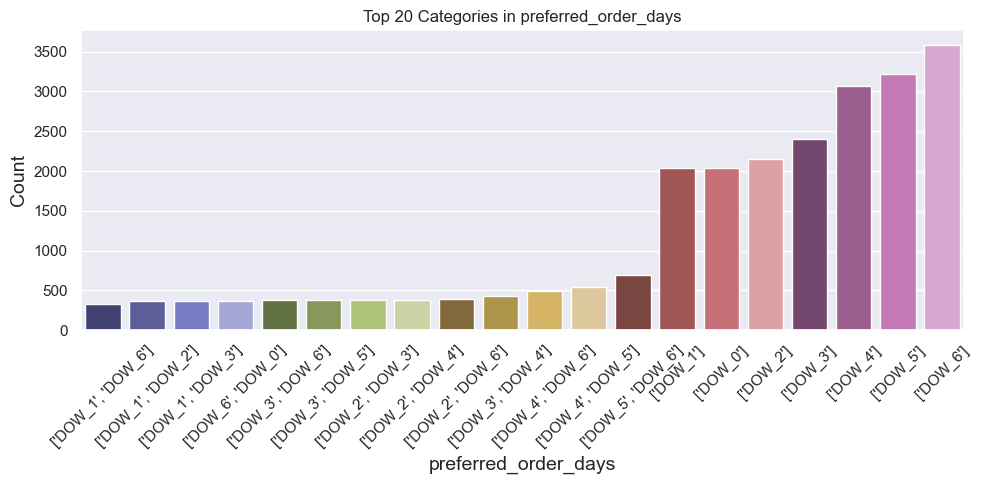

C:\Users\Janny\Documents\GitHub\Data_Mining_2425\src\New_Features.py:300: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered,


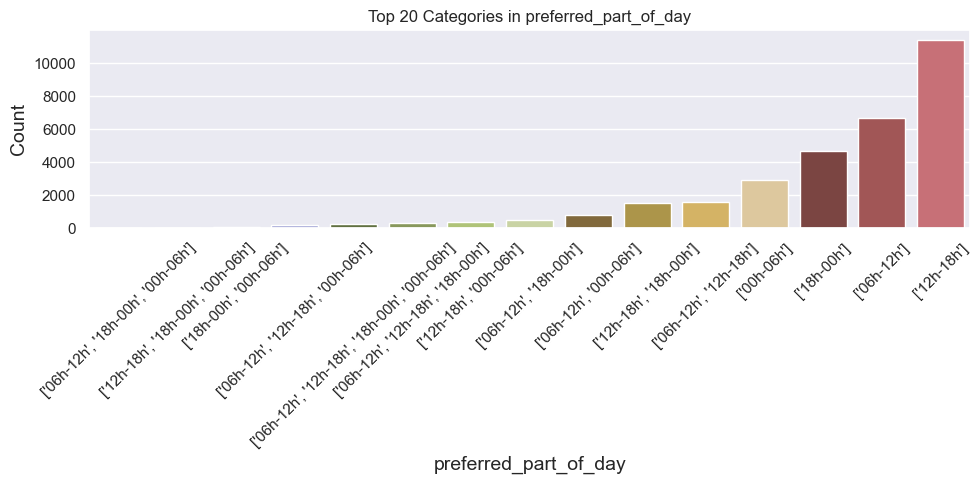

Percentage of missing values:
 avg_per_product       0.440529
avg_per_order         0.440529
avg_order_size        0.440529
chain_preference      0.440529
loyalty_to_venders    0.440529
dtype: float64
Percentage of missing values:
 Series([], dtype: float64)


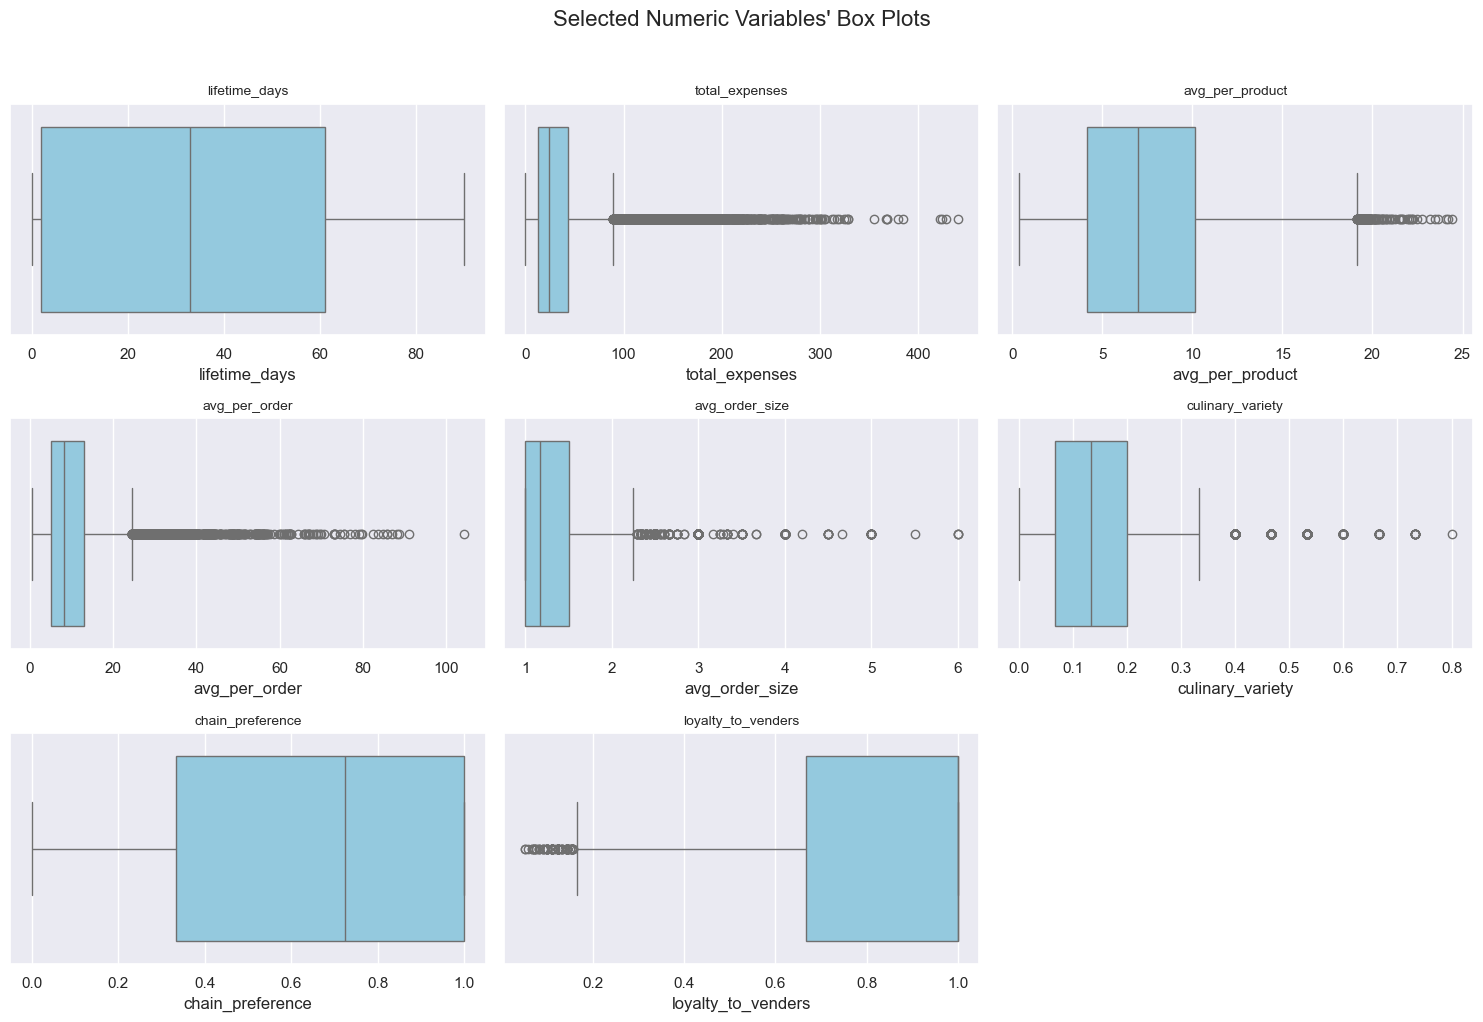

lifetime_days              Lower Limit:      -86.5      Upper Limit:      149.5
total_expenses             Lower Limit:  -33.29625      Upper Limit:   89.41375
avg_per_product            Lower Limit:   -4.84249      Upper Limit:   19.12859
avg_per_order              Lower Limit:   -6.58605      Upper Limit:   24.52763
avg_order_size             Lower Limit:       0.25      Upper Limit:       2.25
culinary_variety           Lower Limit:   -0.13333      Upper Limit:        0.4
chain_preference           Lower Limit:   -0.66667      Upper Limit:        2.0
loyalty_to_venders         Lower Limit:    0.16667      Upper Limit:        1.5
Total outliers in lifetime_days: 0
Total outliers in total_expenses: 2364
Total outliers in avg_per_product: 167
Total outliers in avg_per_order: 1629
Total outliers in avg_order_size: 701
Total outliers in culinary_variety: 1145
Total outliers in chain_preference: 0
Total outliers in loyalty_to_venders: 105
-----------------------------
Total global outlier

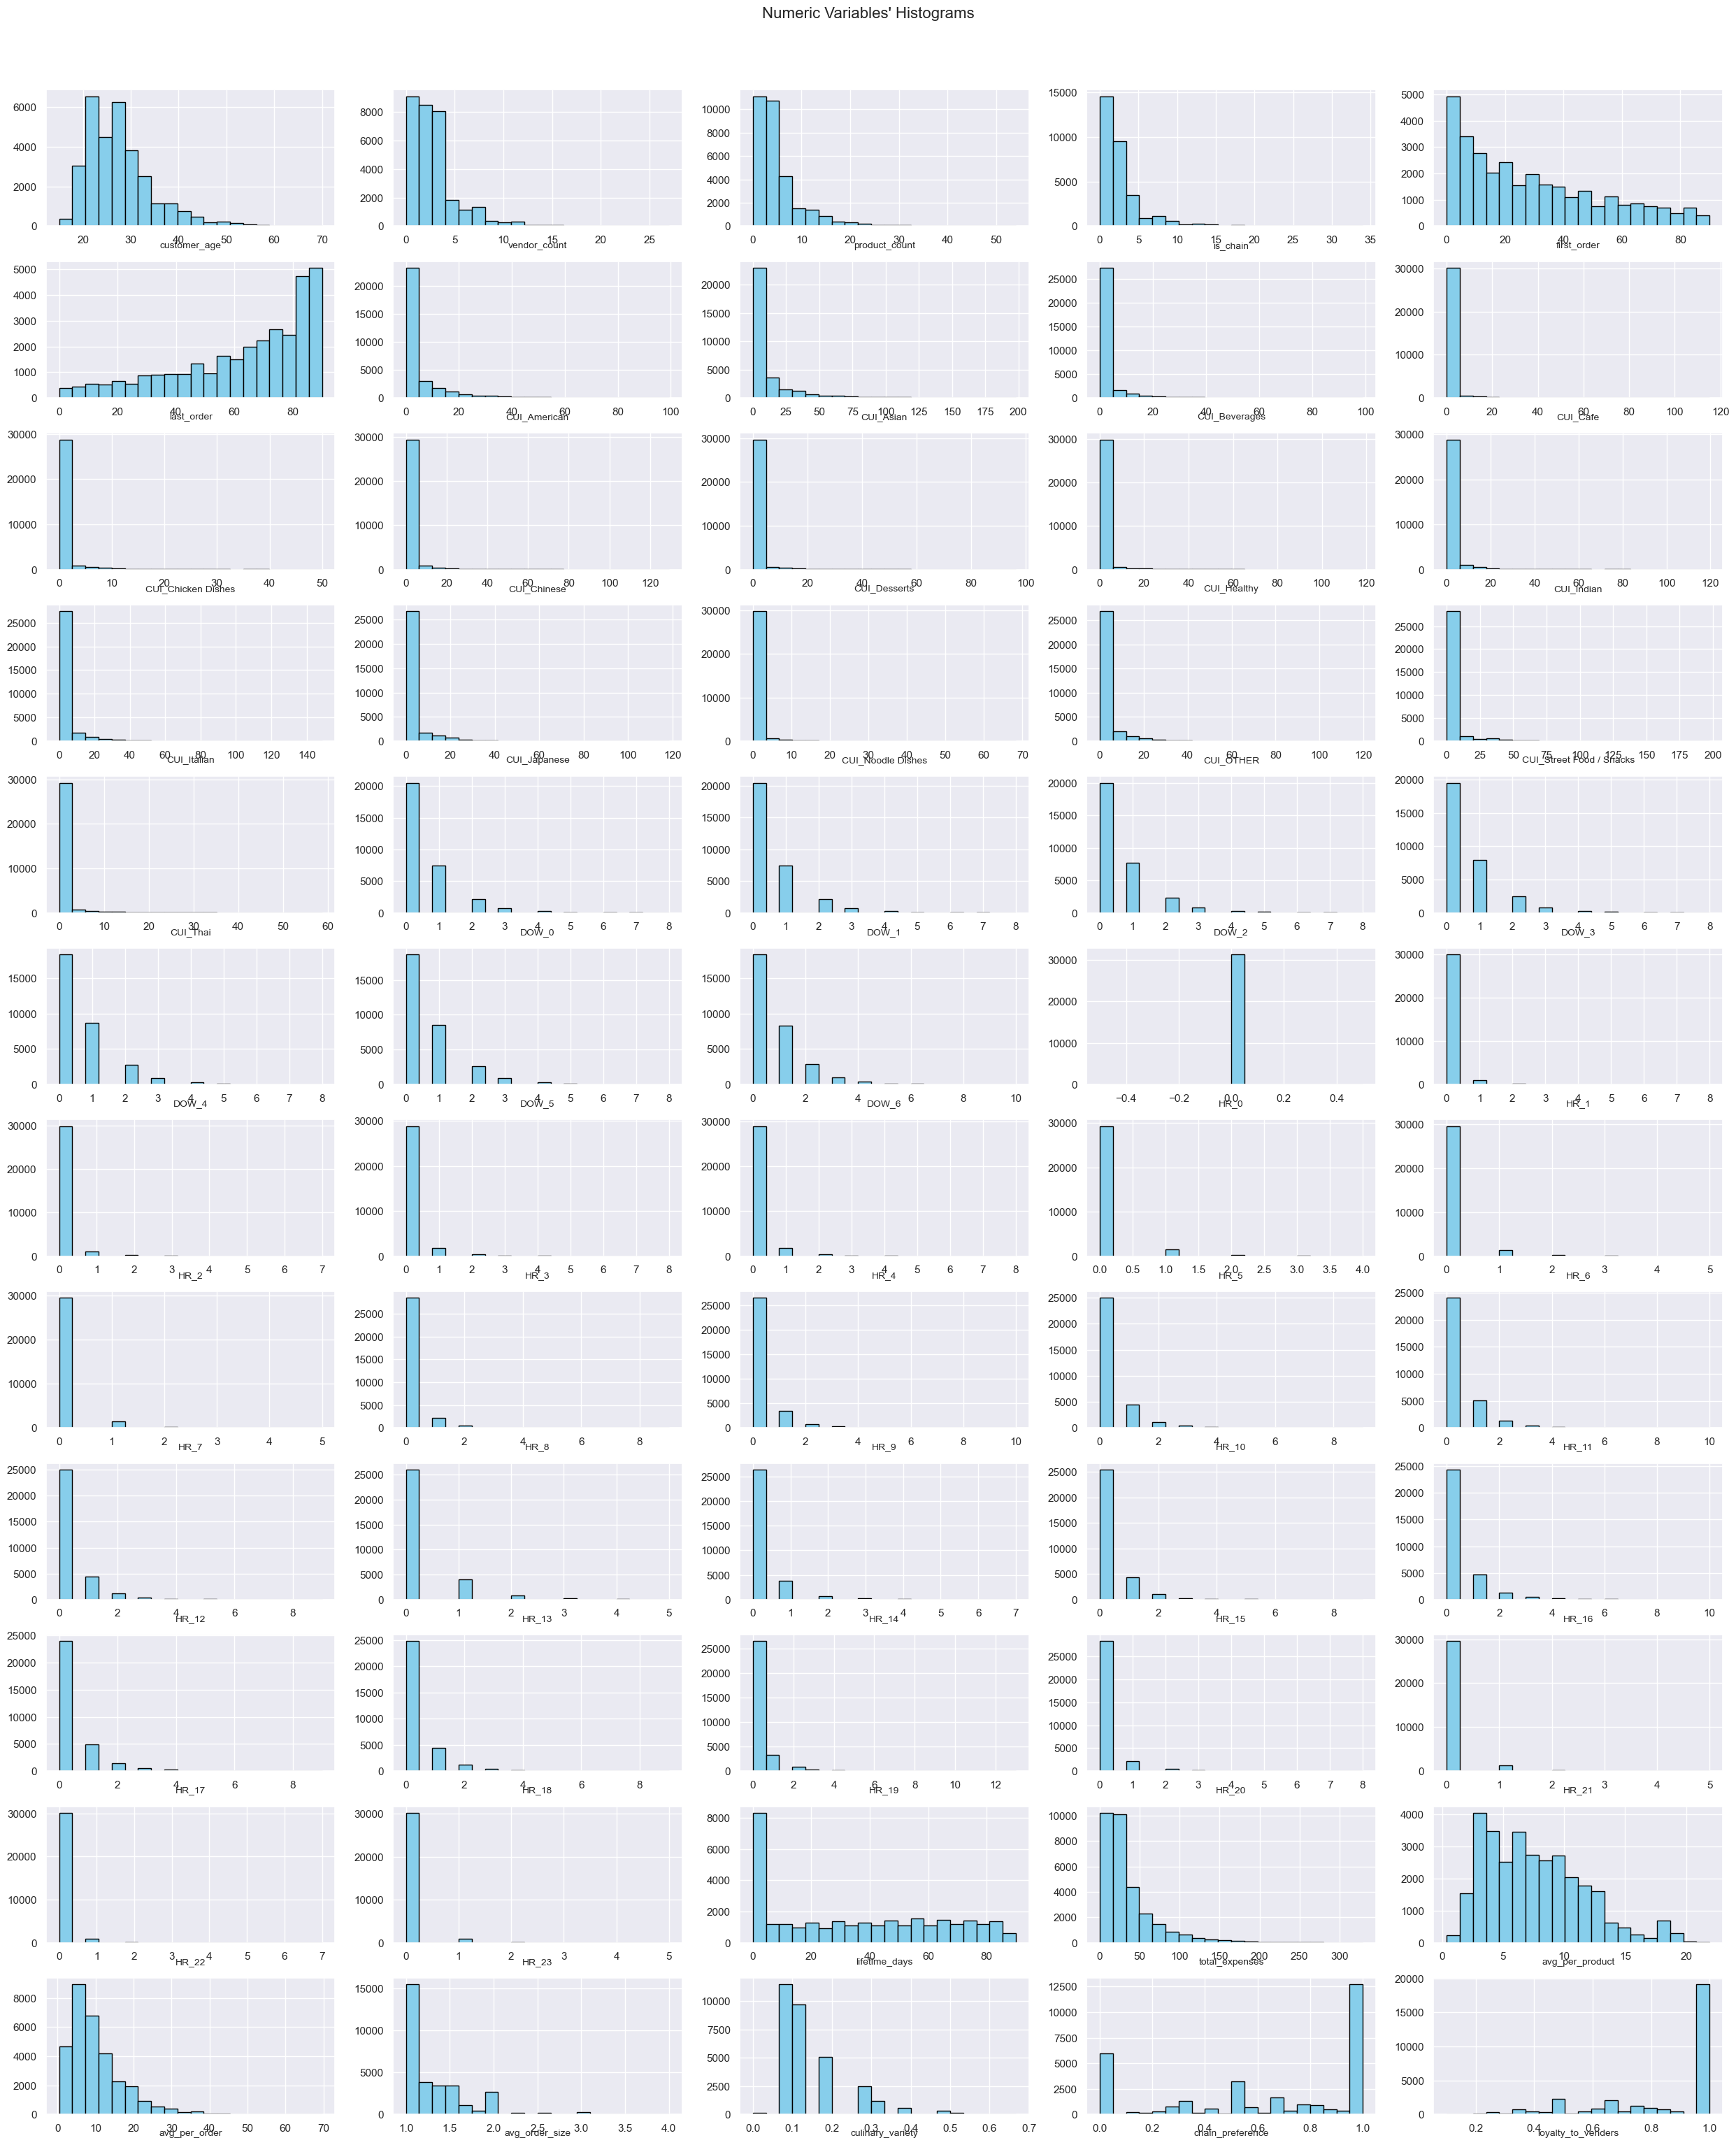

C:\Users\Janny\Documents\GitHub\Data_Mining_2425\src\New_Features.py:572: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered,


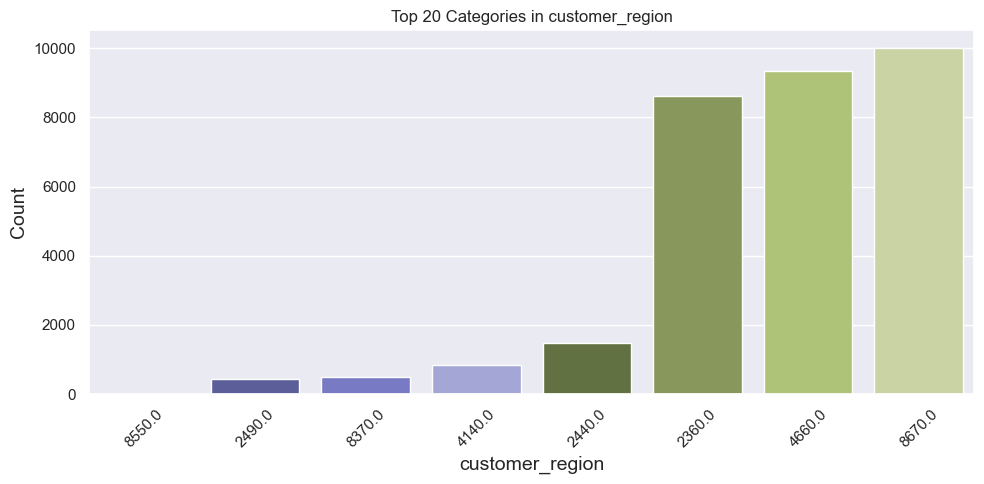

C:\Users\Janny\Documents\GitHub\Data_Mining_2425\src\New_Features.py:572: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered,


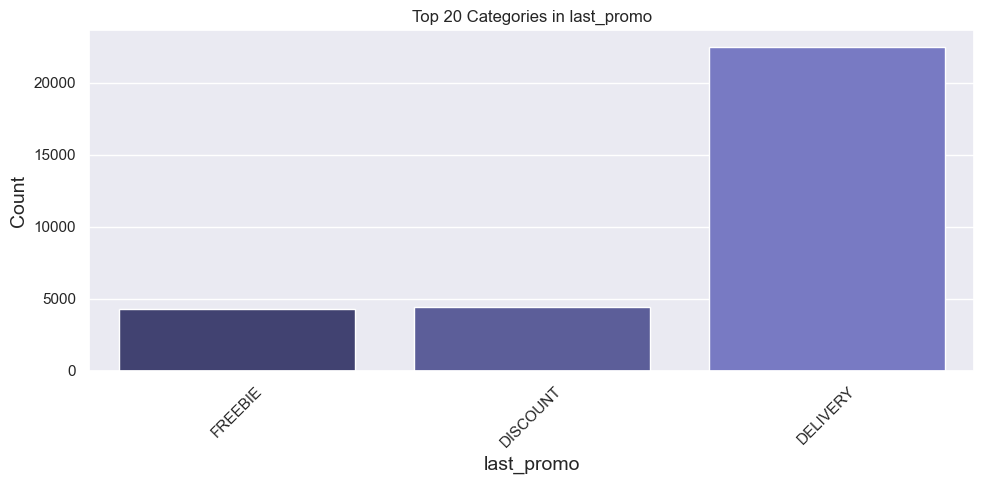

C:\Users\Janny\Documents\GitHub\Data_Mining_2425\src\New_Features.py:572: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered,


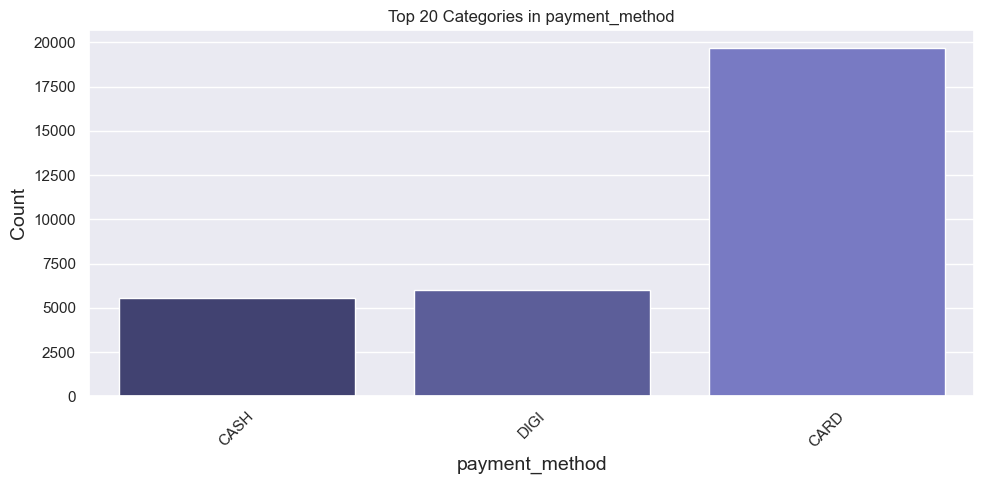

C:\Users\Janny\Documents\GitHub\Data_Mining_2425\src\New_Features.py:572: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered,


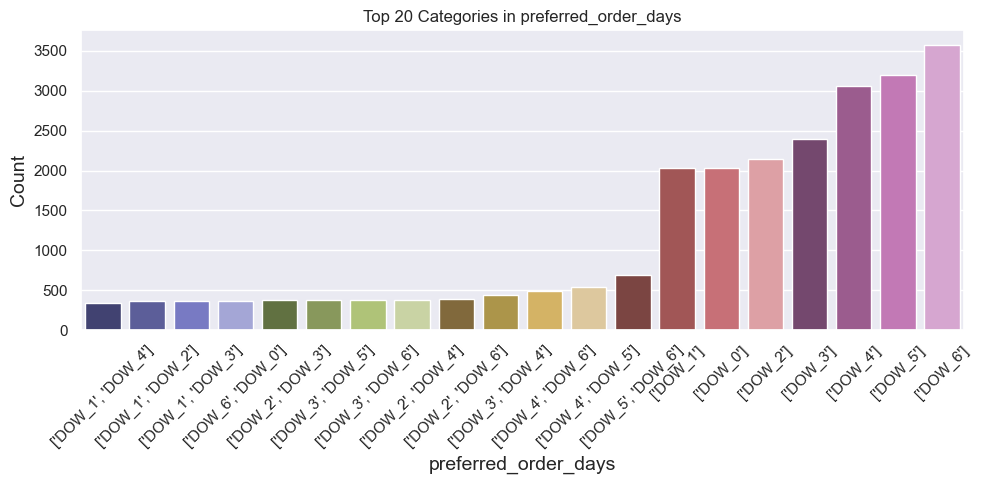

C:\Users\Janny\Documents\GitHub\Data_Mining_2425\src\New_Features.py:572: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_filtered,


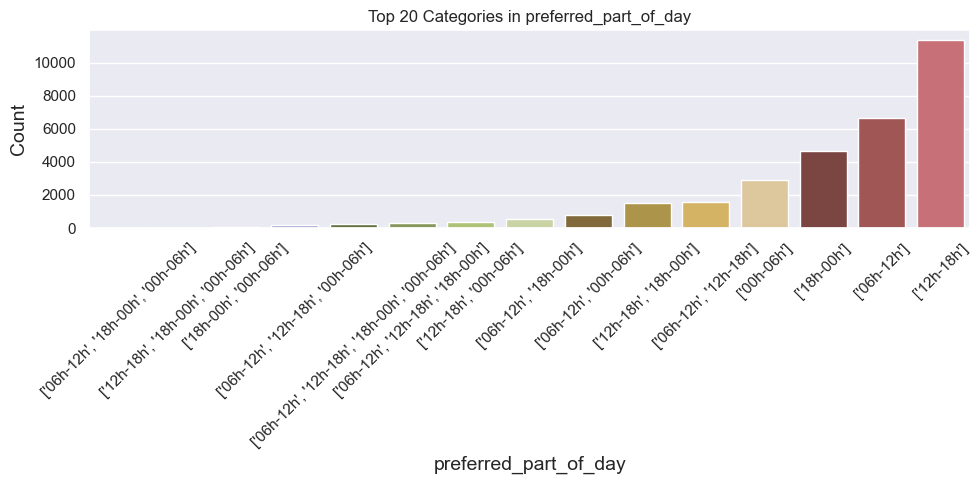

In [2]:
import pandas as pd 
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
import scipy.stats as stats
import warnings

from math import ceil
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from collections import Counter

import plotly.express as px

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from New_Features import * 

from sklearn.feature_selection import VarianceThreshold

In [6]:
df = pd.read_csv("../dataset/df_transform.csv")

In [16]:
df.head(5)

,customer_region,vendor_count,product_count,is_chain,first_order,last_order,lifetime_days,preferred_order_days,preferred_part_of_day,total_expenses,avg_per_product,avg_per_order,avg_order_size,culinary_variety,chain_preference,loyalty_to_venders,customer_age_group,last_promo_DISCOUNT,last_promo_FREEBIE,payment_method_CASH,payment_method_DIGI
0,2360.0,-0.290087,0.327289,-0.455597,-2.510296,-5.371361,-1.221305,"['DOW_6', 'DOW_0']",['18h-00h'],0.219535,-0.247962,0.836736,2.839373,-0.910966,-0.186732,0.669419,-1.313846,0.0,0.0,0.0,1.0
1,8670.0,-0.290087,-0.725594,0.120615,-2.510296,-5.371361,-1.221305,"['DOW_6', 'DOW_0']",['06h-12h'],-0.216113,0.668754,0.216075,-0.802304,-0.132847,0.902339,0.669419,-3.018849,1.0,0.0,0.0,1.0
2,4660.0,-1.105536,-0.725594,0.120615,-2.510296,-5.371361,-1.221305,"['DOW_6', 'DOW_0']",['06h-12h'],-0.977961,-0.638071,-0.839011,-0.802304,-0.910966,0.902339,-1.505379,1.600876,1.0,0.0,1.0,0.0
3,4660.0,-0.290087,-0.288608,-0.455597,-2.510296,-4.720551,-0.980332,"['DOW_1', 'DOW_6']","['06h-12h', '12h-18h']",0.315236,0.838122,0.974250,0.649793,-0.132847,-0.186732,0.669419,-0.104127,0.0,0.0,0.0,1.0
4,4660.0,-0.290087,0.327289,-1.440639,-2.510296,-4.720551,-0.980332,"['DOW_1', 'DOW_6']",['06h-12h'],0.928126,0.936618,1.862202,2.839373,-0.132847,-1.721691,0.669419,-1.313846,0.0,0.0,0.0,1.0


In [11]:
df.columns

Index(['customer_region', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'lifetime_days', 'preferred_order_days',
       'preferred_part_of_day', 'total_expenses', 'avg_per_product',
       'avg_per_order', 'avg_order_size', 'culinary_variety',
       'chain_preference', 'loyalty_to_venders', 'customer_age_group',
       'last_promo_DISCOUNT', 'last_promo_FREEBIE', 'payment_method_CASH',
       'payment_method_DIGI'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31236 entries, 0 to 31235
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_region        31236 non-null  float64
 1   vendor_count           31236 non-null  float64
 2   product_count          31236 non-null  float64
 3   is_chain               31236 non-null  float64
 4   first_order            31236 non-null  float64
 5   last_order             31236 non-null  float64
 6   lifetime_days          31236 non-null  float64
 7   preferred_order_days   31236 non-null  object 
 8   preferred_part_of_day  31236 non-null  object 
 9   total_expenses         31236 non-null  float64
 10  avg_per_product        31236 non-null  float64
 11  avg_per_order          31236 non-null  float64
 12  avg_order_size         31236 non-null  float64
 13  culinary_variety       31236 non-null  float64
 14  chain_preference       31236 non-null  float64
 15  lo

In [13]:
nonmetric_columns = ['customer_region', 'preferred_order_days', 'preferred_part_of_day', 'last_promo_DISCOUNT', 'last_promo_FREEBIE', 'payment_method_CASH', 'payment_method_DIGI']

In [14]:
metric_columns = [col for col in df.columns if col not in nonmetric_columns]

In [15]:
metric_columns

['vendor_count',
 'product_count',
 'is_chain',
 'first_order',
 'last_order',
 'lifetime_days',
 'total_expenses',
 'avg_per_product',
 'avg_per_order',
 'avg_order_size',
 'culinary_variety',
 'chain_preference',
 'loyalty_to_venders',
 'customer_age_group']

## <span style="color:salmon">6. Clustering </span> 


#### <span style="color:salmon"> 6.1 Subtítulo </span> 